<a href="https://colab.research.google.com/github/twisha-k/Python_notes/blob/main/51_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 51: Cumulative Distribution Function


### Teacher-Student Activities

In the previous class, we calculated the $Z$-scores for cholesterol values of patients not having heart disease and also plotted its probability distribution. This distribution is also known as **Standard Normal Distribution**, where the mean and standard deviation will be always 0 and 1 respectively.

In this class, we will find out:

- How many patients who are not suffering from heart disease have cholesterol values between 150 and 200.
- How many patients who are not suffering from heart disease have cholesterol value above 200.

For this, we are going to use the concept of $Z$-scores.

Let's quickly go through the activities covered in the previous class and begin this class from **Activity 1**.


---

**Data Description**

The heart Disease UCI dataset contains data collected on 14 different attributes by examining 303 patients. The dataset focuses only on differentiating patients having heart disease; labelled as value 1 and those not having heart disease; labelled as value 0. The 14 attributes (or columns) are as follows:

|Columns|Description|
|-|-|
|age|age in years|
|sex|sex (1 = male; 0 = female)|
|cp|chest pain type (4 values)|
|trestbps|resting blood pressure (in mm Hg on admission to the hospital)|
|chol|serum cholesterol in $\frac{mg}{dl}$|
|fbs|fasting blood sugar > 120 $\frac{mg}{dl}$|
|restecg|resting electrocardiographic results (values 0, 1, 2)|
|thalach|maximum heart rate achieved|
|exang|exercise induced angina (1 = yes; 0 = no)|
|oldpeak|ST depression induced by exercise relative to rest|
|slope|the slope of the peak exercise ST segment|
|ca|number of major vessels (0-3) colored by fluoroscopy|
|thal|A blood disorder called thalassemia|
|target|1 = presence of heart disease; 0 = absence of heart disease|

**Source:** https://archive.ics.uci.edu/ml/datasets/Heart+Disease




---

#### Loading The Dataset

Dataset Link (do not click on it):

https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/uci-heart-disease/heart.csv

In [ ]:
# Import the required modules and load the heart disease dataset. Also, display the first five rows.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file = 'https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/uci-heart-disease/heart.csv'
df = pd.read_csv(csv_file)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's first look at the complete information on the `df` DataFrame.

In [ ]:
# DataFrame information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB



Let's consider the population of patients NOT having heart disease.

In [ ]:
# Pandas series containing the cholesterol levels for the patients not having heart disease
chol_not_having_disease = df.loc[df['target'] == 0, 'chol']
chol_not_having_disease

165    286
166    229
167    268
168    254
169    203
      ... 
298    241
299    264
300    193
301    131
302    236
Name: chol, Length: 138, dtype: int64

---

#### Activity 1: Calculating Probabilities Using $Z$-Score^

In the previous class, we had also calculated the $Z$-scores for all the values in the `chol_not_having_disease` Pandas series by creating a function `get_zscore()`.

In [ ]:
# S1.1: Create a Function to calculate Z-scores of all cholesterol values
def z_score(array):
  return (array-array.mean())/array.std()
# Obtain Z-scores for all patients not having heart disease
z_score_not_havin_dis = z_score(chol_not_having_disease)
z_score_not_havin_dis

165    0.705961
166   -0.446611
167    0.341991
168    0.058903
169   -0.972345
         ...   
298   -0.203964
299    0.261109
300   -1.174551
301   -2.428226
302   -0.305067
Name: chol, Length: 138, dtype: float64

$Z$-scores allows us to calculate the probability of a continuous random variable or percentage of area under the standard normal distribution curve.

Recall that in one of our previous class, to calculate the probability of a continuous random variable, we used the **Probability Density Function (PDF)**, i.e.,


$$\rho(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$$

where,

- $\rho (x)$ read as **Rho**, is dependent on $x$ which is some arbitrary value of the random variable $X$.

- $\sigma$ is the standard deviation of the sample.

- $\mu$ is the mean value of the sample.

- $e = 2.71$ and $\pi = 3.14$

We had also created a function `prob_density_func()` to calculate the **Probability Density Function (PDF)** of a continuous random variable.


In [ ]:
# S1.2: Create a function to calculate the individual probabilities of cholesterol values.
def prob_desity_fun(array,mean,std):
  coff=1/(std*np.sqrt(2*np.pi))
  power_of_e=np.exp(-(array-mean)**2/(2*std**2))
  return coff*power_of_e

If you rearrange the terms in the power of $e$, you will get an expression for $Z$-score

$$\rho(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}$$

$$\Rightarrow \rho(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2}Z^2}$$

where $Z = \frac{x - \mu}{\sigma}$

To find the probability of a patient not suffering from heart disease and have a cholesterol value (denoted by random variable $X$) between 150 and 200, i.e., $150 \le X \le 200$, we need to calculate area under the curve enclosed between $X = 150$ and $X = 200$.

Let us first plot the individual probabilities of cholesterol values of patients not having heart disease and shade the area between $X = 150$ and $X = 200$ i.e. $P(150 \le X \le 200)$


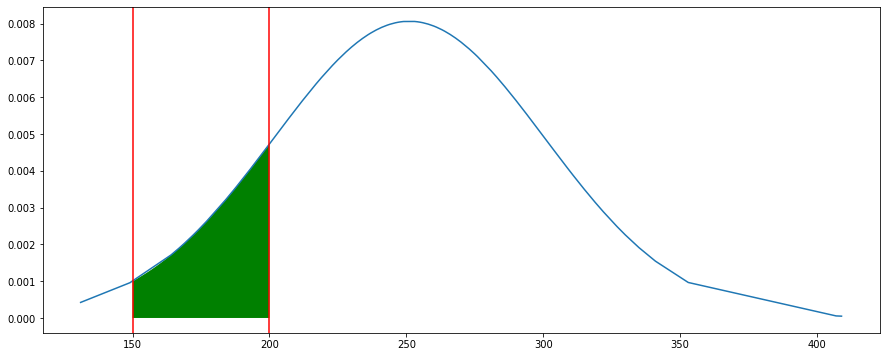

In [ ]:
# T1.1: Plot normal distribution of cholesterol values for the patients not having heart disease.
# Also, fill the area between X = 150 and X = 200.
prob = prob_desity_fun(np.arange(150,201),chol_not_having_disease.mean(),chol_not_having_disease.std())#filling the graph
rho = prob_desity_fun(chol_not_having_disease.sort_values(),chol_not_having_disease.mean(),chol_not_having_disease.std())
plt.figure(figsize = (15,6))
plt.plot(chol_not_having_disease.sort_values(),rho)
plt.axvline(150,color = "r")
plt.axvline(200,color = "r")
plt.fill_between(np.arange(150,201),prob,facecolor = "green")

In the above code, we performed following tasks:
- First, we calculated the probabilities of values between 150 and 200 by passing following three parameters to the `prob_density_func()` function:
    1. An array of values from 150 to 200.
    2. Mean cholesterol value.
    3. Standard deviation of cholesterol values.

- Then, we calculated the probabilities of all cholesterol values of patients not having heart disease by passing the following three parameters to the function `prob_density_func()`:
    1. A sorted DataFrame consisting of the population of patients not having heart disease.
    2. Mean cholesterol value.
    3. Standard deviation of cholesterol values.

- Next, we plotted our normal distribution with $x$-axis having sorted cholesterol values and $y$-axis representing probability densities of cholesterol values.

- To fill the area between the PDF, $X = 150$ and $X = 200$, we used `fill_between()` function. It requires the two following parameters:
    - `x`=  An array of values from 150 to 200.
    - `y1`= Probability density values for cholesterol level between 150 and 200.

Now, to find the area of the shaded region, we will evaluate the following expression:

$$P(150 \le X \le 200) = \int_{150}^{200} \rho (x) dx$$

In one of our previous class, we had calculated $P(150 \le X \le 200)$ using `quad()` function of the `integrate` module. But here, we can do this by using the concept of $Z$-scores as follows:

$$P(150 \le X \le 200)$$

$$= P\left(\frac {150-\mu}{\sigma} \le \frac {X-\mu}{\sigma} \le \frac {200-\mu}{\sigma}\right)$$

$$= P\left(\frac {150-\mu}{\sigma} \le Z \le \frac {200-\mu}{\sigma}\right)$$

$$= P(z_{1} \le Z \le z_{2})$$

$$= P(Z \le z_{2}) - P(Z \le z_{1})$$

where,

- $z_{1}$ is the $Z$-score of cholesterol level $150$

- $z_{2}$ is the $Z$-score of cholesterol level $200$

- $\mu$ is the mean cholesterol level for the patients not having heart disease

- $\sigma$ is the standard deviation in the cholesterol level for the patients not having heart disease



---

#### Activity 2: Probability Calculation Using `cdf()` Function^^

Now let's find out the probability of patients not suffering from heart disease and having cholesterol levels less than 200. To do this, perform the following tasks:
- First compute the $Z$-score for 200 using the following expression $$Z = \frac{X - \mu}{\sigma}$$
  
  where $X = 200$

- Then apply the `cdf()` function of the `scipy` module.

In [ ]:
# T2.1: Calculate the z-score for the cholesterol level of 200.
z_score_200=(200-chol_not_having_disease.mean())/chol_not_having_disease.std()
z_score_200

-1.0330068885126857

Now calculate probability of patients not having heart disease having cholesterol less than 200, i.e., $P(Z \le -1.033)$ and plot these individual probabilities.

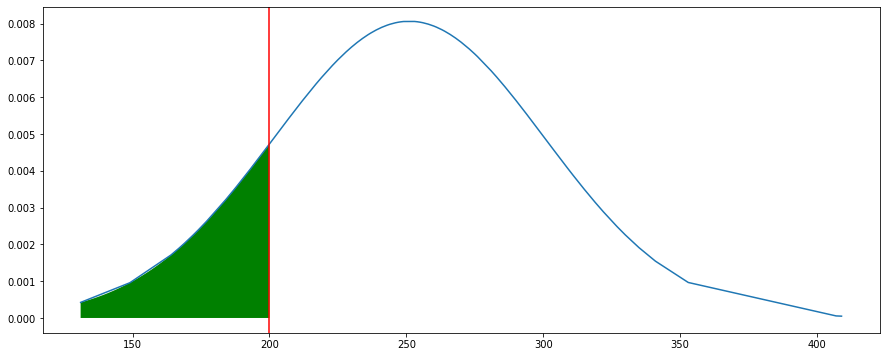

In [ ]:
# T2.2: Create normal distribution of cholesterol values less than 200. Also, fill the area for X < 200.
prob_200 = prob_desity_fun(np.arange(chol_not_having_disease.min(),201),chol_not_having_disease.mean(),chol_not_having_disease.std())#filling the graph
rho = prob_desity_fun(chol_not_having_disease.sort_values(),chol_not_having_disease.mean(),chol_not_having_disease.std())
plt.figure(figsize = (15,6))
plt.plot(chol_not_having_disease.sort_values(),rho)
plt.axvline(200,color = "r")
plt.fill_between(np.arange(chol_not_having_disease.min(),201),prob_200,facecolor = "green")

Now, calculate the probability of above shaded area i.e. $P(X \le 200)$.  This filled area represents the cumulative distribution function of values less than 200.

**Q: What is the cumulative distribution function (CDF)?**

**A:** A cumulative distribution function (CDF) of a random variable $X$ is the probability that $X$ will take a value less than or equal to a specific value ($x$) i.e.
$$\text{CDF}(X) = P(X \le x)$$

Here, we will use in-built function `norm.cdf()` of the `scipy.stats` module to calculate $P(X \le 200)$ i.e. $P(Z \le -1.033)$. This function takes an argument of a $Z$-score for an observation and returns the proportion of values less than that observation.

**Syntax:** `scipy.stats.norm.cdf(zscore)`


In [ ]:
# T2.3: Calculate the probability of patients not having heart disease having cholesterol less than 200.
from scipy.stats import norm
norm.cdf(z_score_200)

0.15080033750158173


Thus, the probability of patients not having heart disease having cholesterol level less than 200 is 15.08% or you can say that approx 15% of the patients not having heart disease have the cholesterol level less than 200.

Similarly, compute the $Z$-score for cholesterol level of 150.

In [ ]:
# S2.1: Find the z-score for cholesterol level of 150.
z_score_150=(150-chol_not_having_disease.mean())/chol_not_having_disease.std()
z_score_150

-2.0440349070570165

Now, calculate probability of patients not having heart disease having cholesterol less than 150, i.e., $P(Z \le -2.044)$ and plot these individual probabilities.

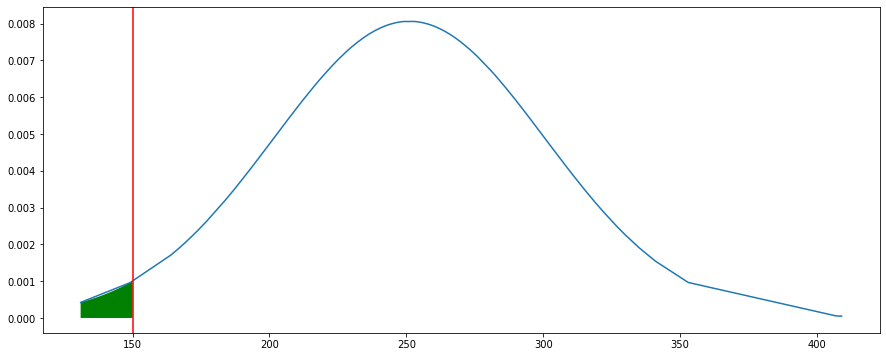

In [ ]:
# S2.2: Create a normal distribution of cholesterol values less than 150. Also, fill the area for X < 150.
prob_150 = prob_desity_fun(np.arange(chol_not_having_disease.min(),151),chol_not_having_disease.mean(),chol_not_having_disease.std())#filling the graph
rho = prob_desity_fun(chol_not_having_disease.sort_values(),chol_not_having_disease.mean(),chol_not_having_disease.std())
plt.figure(figsize = (15,6))
plt.plot(chol_not_having_disease.sort_values(),rho)
plt.axvline(150,color = "r")
plt.fill_between(np.arange(chol_not_having_disease.min(),151),prob_150,facecolor = "green")

Now, calculate the probability of the above shaded area, i.e., $P(X \le 150)$ by applying `norm.cdf()` function.

In [ ]:
# S2.3: Calculate the probability of patients not having heart disease having cholesterol level less than 150.
norm.cdf(z_score_150)

0.020475049402598002

Thus, the probability of patients not having heart disease having cholesterol level less than 150 is 2.047% or you could say that approx 2% of the patients not having heart disease have the cholesterol level less than 150.

So, the probability of patients not having heart disease and having cholesterol levels between 150 and 200 can be obtained by subtracting the probability of higher value (i.e. 200) from the lower value (i.e. 150).

 i.e. $$P(150 \le X \le 200)=P(-2.044 \le Z \le -1.033) = P(Z \le -1.033) - P(Z \le -2.044)$$

In [ ]:
# S2.4: Find out the probability of patients not having heart disease having cholesterol level between 150 and 200.
norm.cdf(z_score_200)-norm.cdf(z_score_150)

0.13032528809898372

The probability of patients not having heart disease having cholesterol level between 150 and 200 is 13.032% or you could say that approx 13% patients not having heart disease have cholesterol level between 150 and 200.

---

#### Activity 3: Probability of Continuous Random Variable Above a $Z$-Score^^^

Let's compute the probability of patients not having heart disease having cholesterol level more than 200. For this, you have to subtract the probability of patients not having heart disease having cholesterol level less than 200 from the total probability, i.e.,

$$P(Z > -2.044) = 1 - P(Z \le -2.044)$$

Before that, plot the probability distribution of cholesterol values above 200.

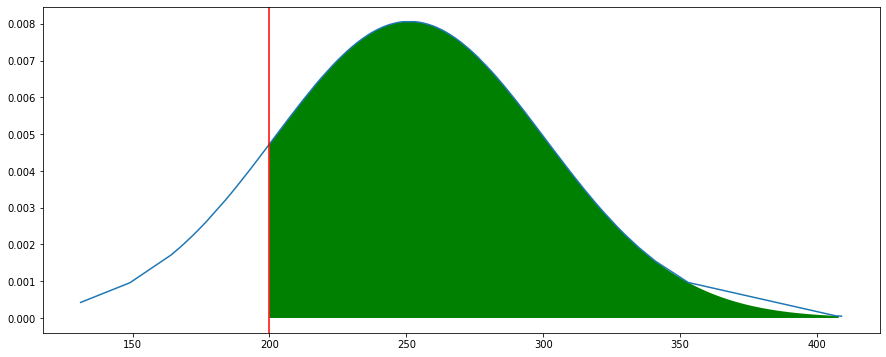

In [ ]:
# S3.1: Create normal distribution of cholesterol values above 200. Also, fill the area for X > 200.
prob_150 = prob_desity_fun(np.arange(200,chol_not_having_disease.max()),chol_not_having_disease.mean(),chol_not_having_disease.std())#filling the graph
rho = prob_desity_fun(chol_not_having_disease.sort_values(),chol_not_having_disease.mean(),chol_not_having_disease.std())
plt.figure(figsize = (15,6))
plt.plot(chol_not_having_disease.sort_values(),rho)
plt.axvline(200,color = "r")
plt.fill_between(np.arange(200,chol_not_having_disease.max()),prob_150,facecolor = "green")

Now calculate the probability of patients not having heart disease having cholesterol level above 200. This probability can be obtained by subtracting the probability of patients having cholesterol value less than $200$ from the total probability i.e $1$ .



In [ ]:
# S3.2: Calculate the probability of patients not having heart disease having cholesterol level more than 200.
z_score_greater_200=(chol_not_having_disease.mean()-200)/chol_not_having_disease.std()
z_score_greater_200
norm.cdf(z_score_greater_200)

0.8491996624984183

In [ ]:
1-norm.cdf(z_score_200)

0.8491996624984183

This means that nearly $85 \%$ of the patients not having heart disease have cholesterol value above 200.

---

### **Project**
You can now attempt the **Capstone Project 13 - Life Expectancy Analysis** on your own.

**Capstone Project 13 - Life Expectancy Analysis**: https://colab.research.google.com/drive/18bEarC7OLB5Iy98-CyOdMz5VqtElk5qy

---